<a href="https://colab.research.google.com/github/MaxBusha/CS-5324/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5328 Lab Assignment 2: Exploring Image Data

# 1. Business Understanding
The dataset chosen contains 15,000 images of vegetables that are each categorized into different subfolders based on what type of vegetable it is. This data was originally collected from Vegetable Farm and Market by the author. Because many steps of vegetable production and delivery is done manually, this data was collected to develop a model that could detect and classify vegetables.

The prediction task for this dataset is to identify the important features of an image. This could be useful to companies that sell vegetables and want to know what the key features are to high quality vegetables. It could also be useful to those who work in agriculture or farming because PCA can help identify which features are associated with diseases or harm from pesticides. Additionally, it would help identify the type of vegetable based off of those important features determined. This data is important because identifying vegetables can be done automatically instead of manually by people. It is more efficient and saves time and energy.

In order for our prediction algorithm performance to be considered useful, it should accurately remove unnecessary dimensions of the dataset so that it will be easier to analyze. Those who work in agriculture, farming, or companies that sell vegetables will be able to see trends and make conclusion more accurately if PCA is performed and removes the unnecessary dimensions that would make it challenging to visualize and analyze images. With better data, companies find ways to increase their sales and produce/distribute vegetables of higher quality.



Below are some installs that are used to make sure we can get the kaggle data, we also included some that should be there for redundancy

# 2. Data Preparation

In [76]:
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install pillow

**This** code cell includes the first two imports and the download of the kaggle dataset


In [77]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset")

Skipping, found downloaded files in "./vegetable-image-dataset" (use force=True to force download)


This code block is used to import the rest of the libraries that will be used in the project. It also includes the steps used to iterate over the subfolder directory to organize the pictures that we will use into a list, both linearizing it and making it greyscale in the process. This is done to make the image data-dense and more workable for the computationally expensive steps later in the process.

In [78]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image

# Path to the directory containing subfolders
data_dir = "vegetable-image-dataset/Vegetable Images/train"

# Initialize lists to store image data and labels
image_data = []
labels = []
specified_labels = ["Pumpkin", "Radish", "Bean", "Bottle_Gourd"]  # Specify the labels you want to access


# Iterate through each subfolder in the directory
for label in os.listdir(data_dir):
    if label not in specified_labels:
        continue  # Skip labels not in specified_labels
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        # Iterate through each image file in the subfolder
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            # Read the image
            image = Image.open(image_path)
            # print(label)
            grayscale_image = image.convert("L")

            img1array = np.asarray(grayscale_image)
            # img1array = np.asarray(image)
            img1flat = img1array.flatten()
            # img1flat_with_label = np.append(img1flat, label)


            if img1flat.shape != (50176,):
              continue

            # Append the image data and label to lists
            image_data.append(img1flat)
            labels.append(label)


# max_length = max(len(arr) for arr in image_data)
# min_length = min(len(arr) for arr in image_data)

# print(max_length)
# print(min_length)

# padded_image_data = [np.pad(arr, (0, max_length - len(arr)), mode='constant') for arr in image_data]

# transpose = np.array(padded_image_data).T.tolist()

# # Create a DataFrame
# df = pd.DataFrame(transpose)

# # Create a DataFrame using Pandas
# df = pd.DataFrame({'Image Data': image_data, 'Label': labels})

# # Display the DataFrame
# print(df)


In [ ]:
np.save('img_data_array.npy', image_data)


In [79]:
print('img_data_array.npy')

img_data_array.npy


The below code blocks are used to check that the labels for the data were stored correctly and that the shape of the image data is to be expected. They show that all the unique labels are stored correctly and that the image shape is (50175, 0) as the images were initially (224, 224, 3) and we made them greyscale and linearized them (224*224=50175).

In [80]:
unique_valuestest = set(labels)
print(unique_valuestest)

{'Radish', 'Pumpkin', 'Bottle_Gourd', 'Bean'}


In [81]:
print(labels)
print(len(labels))

['Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin', 'Pumpkin'

In [82]:
print(img1flat.shape)
print(np.shape(image_data[0])[0])
print(np.shape(image_data))

(50176,)
50176
(4000, 50176)


The below step is vestigial as the error it handled was later tackled in previous code cells. The error that arose previously was that some of the images were different sizes. This was fixed here by padding the images but upon further inspection, we found that the subset of misshapen images was extremely small and could instead just be ignored. For example the misshapen images in the test subfolder included just one out of three thousand images.

In [83]:
max_length = max(len(arr) for arr in image_data)
min_length = min(len(arr) for arr in image_data)

print(max_length)
print(min_length)

padded_image_data = [np.pad(arr, (0, max_length - len(arr)), mode='constant') for arr in image_data]

max_length = max(len(arr) for arr in padded_image_data)
min_length = min(len(arr) for arr in padded_image_data)

print(max_length)
print(min_length)


50176
50176
50176
50176


The below code cell is the creation of the dataframe to store the data. It proved to be very computationally expensive and took a long time to resolve but worked appropriately for what we wanted and envisioned for the project.

In [ ]:

# columns = [f'Column{i}' for i in range(max_length)]




# df = pd.DataFrame(padded_image_data, columns=columns)

# # Display the DataFrame
# print(df)

      Column0  Column1  Column2  Column3  Column4  Column5  Column6  Column7  \
0          42       32       14        4        4        2       12       39   
1         141      140      134      139      136      130      132      123   
2         150      159      163      158      155      157      162      166   
3         250      247      244      243      243      243      243      243   
4          49       49       48       46       44       44       43       42   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3995      136      131      147      134      133      152      142      137   
3996      167      166      164      163      162      162      162      162   
3997       22       24       23       20       22       25       23       17   
3998       93      119      159      158      166      191      178      162   
3999      142      135      143      138      151      127      130      143   

      Column8  Column9  ...  Column5016

The following code cell was just used to make sure that the dataframe had the appropriate dimensions and shape along with ensuring that the labels were maintained as well as we were concerned about ensuring labels were intact and properly related to images.

In [ ]:
# print(df.shape)

# df['Label'] = labels

# df.Label.unique()

NameError: name 'df' is not defined

The below cell block is used to visualize some of the images int he dataframe showing that we can bring the images back up from their linearized state so that we can move forward with the lab goals.

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import imshow, show
# # filtered_df = df[df['Label'] == desired_label]

# unique_labels = df['Label'].unique()
# print(unique_labels)
# unique_labels = unique_labels[:2]

# for labels in unique_labels:
#   # first_entry_for_label = df[df['Label'] == labels].iloc[0]

#   # img = df.iloc[0, :50176].values

#   # img = first_entry_for_label['Image Data']
#   entries_for_label = df[df['Label'] == labels]

#   # Retrieve the first 50176 features of the first entry for the current label
#   img = entries_for_label.iloc[0, :50176].values

#   img = img.reshape(224, 224)

#   print(img.shape)

#   img = img.astype(np.uint8)

#   plt.xticks(())
#   plt.yticks(())

#   plt.imshow(img, cmap='gray')
#   show()


NameError: name 'df' is not defined

list functionality

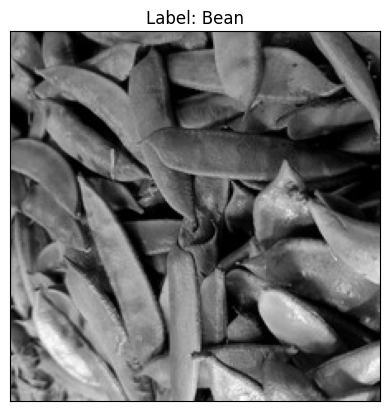

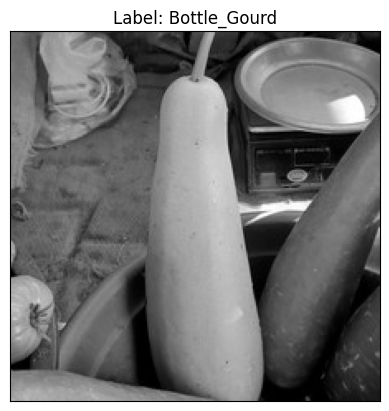

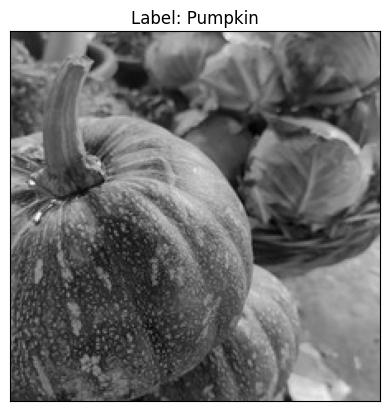

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists 'image_data' containing image data and 'labels' containing corresponding labels

# Get unique labels
unique_labels = np.unique(labels)
unique_labels = unique_labels[:3]  # Select only the first two unique labels for demonstration

for label in unique_labels:
    # Find indices of images with the current label
    indices_for_label = [i for i, lbl in enumerate(labels) if lbl == label]

    # Retrieve the first image for the current label
    img_index = indices_for_label[0]
    img_data = image_data[img_index]

    # Reshape image data to its original shape (e.g., 224x224)
    img_data = img_data.reshape(224, 224)

    # Plot the image
    plt.xticks(())
    plt.yticks(())
    plt.imshow(img_data, cmap='gray')
    plt.title(f'Label: {label}')  # Add label as title
    plt.show()

# 3. Data Reduction

The following data comprises our PCA dimensionality reduction of the dataset. We extract the most valuable eigen"vegetables" and visualize them along with the variance explained by the data values.

Extracting the top 500 eigenvegetables from 4000 vegetables
CPU times: user 2min 27s, sys: 6.98 s, total: 2min 34s
Wall time: 1min 31s


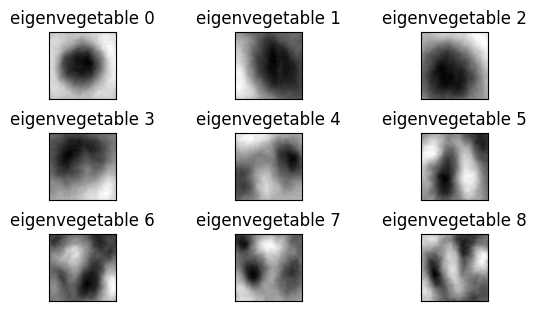

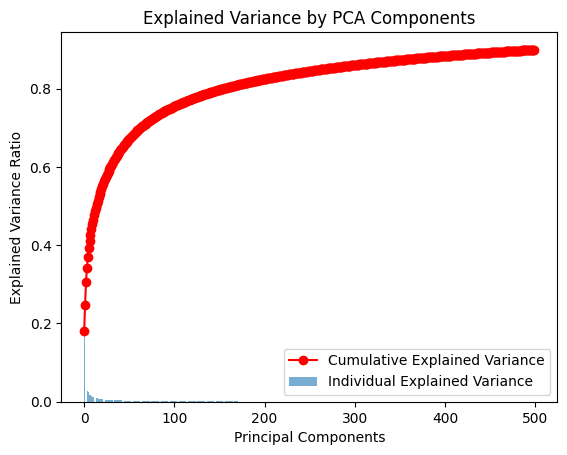

In [ ]:
# from sklearn.decomposition import PCA

# # lets do some PCA of the features and go from 1850 features to 20 features
# def plot_explained_variance(pca):
#     explained_var = pca.explained_variance_ratio_
#     cum_var_exp = np.cumsum(explained_var)
#     plt.bar(range(len(explained_var)), explained_var, alpha=0.6, label='Individual Explained Variance')
#     plt.plot(range(len(cum_var_exp)), cum_var_exp, label='Cumulative Explained Variance', color='red', marker='o')
#     plt.xlabel('Principal Components')
#     plt.ylabel('Explained Variance Ratio')
#     plt.title('Explained Variance by PCA Components')
#     plt.legend(loc='best')
#     plt.show()
# # end def plot_explained_variance()

# #via ChatGPT4
# features = df.drop('Label', axis = 1)
# labels = df['Label']

# n_components = 500

# print(f'Extracting the top {n_components} eigenvegetables from {features.shape[0]} vegetables')

# pca = PCA(n_components=n_components)
# %time pca.fit(features.copy())

# eigenvegetables = pca.components_.reshape((n_components, 224, 224))

# eigenvegetable_titles = ["eigenvegetable %d" % i for i in range(eigenvegetables.shape[0])]

# #via ChatGPT4
# for i in range(9):
#     plt.subplot(int(3) + 1, 3, i + 1)
#     plt.imshow(eigenvegetables[i], cmap='gray')
#     plt.title(eigenvegetable_titles[i])
#     plt.xticks(())
#     plt.yticks(())
#     plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
# plt.show()

# plot_explained_variance(pca)

list functionality

Extracting the top 500 eigenvegetables from 4000 vegetables
CPU times: user 2min 9s, sys: 7.18 s, total: 2min 16s
Wall time: 1min 25s


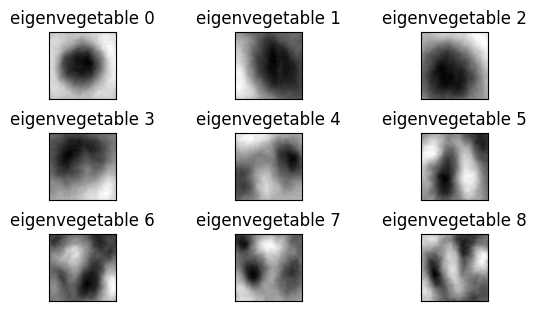

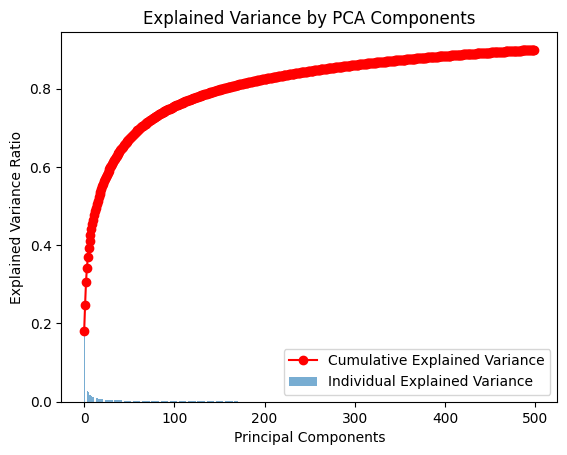

In [87]:
from sklearn.decomposition import PCA

# Function to plot explained variance by PCA components
def plot_explained_variance(pca):
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    plt.bar(range(len(explained_var)), explained_var, alpha=0.6, label='Individual Explained Variance')
    plt.plot(range(len(cum_var_exp)), cum_var_exp, label='Cumulative Explained Variance', color='red', marker='o')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by PCA Components')
    plt.legend(loc='best')
    plt.show()

# Assuming you have lists 'features' containing features and 'labels' containing corresponding labels

n_components = 500

print(f'Extracting the top {n_components} eigenvegetables from {len(image_data)} vegetables')

# Perform PCA
pca = PCA(n_components=n_components)
%time pca.fit(image_data)

# Reshape eigenvegetables
eigenvegetables = pca.components_.reshape((n_components, 224, 224))

eigenvegetable_titles = ["eigenvegetable %d" % i for i in range(eigenvegetables.shape[0])]

# Plot first 9 eigenvegetables
for i in range(9):
    plt.subplot(int(3) + 1, 3, i + 1)
    plt.imshow(eigenvegetables[i], cmap='gray')
    plt.title(eigenvegetable_titles[i])
    plt.xticks(())
    plt.yticks(())
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Plot explained variance
plot_explained_variance(pca)


Cell below is used to reconstruct images of vegetables from the PCA used above. The results look pretty promised considering how much data we removed using the PCA.

In [ ]:
# # time to reconstruct some vegetables!!!
# def reconstructVeggie(to, of):
#   loRep = to.transform(of)
#   recImg = to.inverse_transform(loRep)
#   return loRep, recImg
# # end def reconstructVeggie

# ndxToReconstruct = 5

# featuresNdx = features.iloc[ndxToReconstruct].values

# ldr, reconstructed = reconstructVeggie(pca, featuresNdx.reshape(1, -1))

# plt.subplot(1,2,1)
# plt.imshow(featuresNdx.reshape((224, 224)), cmap=plt.cm.gray)
# plt.title('Original Vegetable')
# plt.grid(False)
# plt.subplot(1,2,2)
# plt.imshow(reconstructed.reshape((224, 224)), cmap=plt.cm.gray)
# plt.title('Reconstructed Vegetable from Full PCA')
# plt.grid(False)

AttributeError: 'list' object has no attribute 'iloc'

list functionality

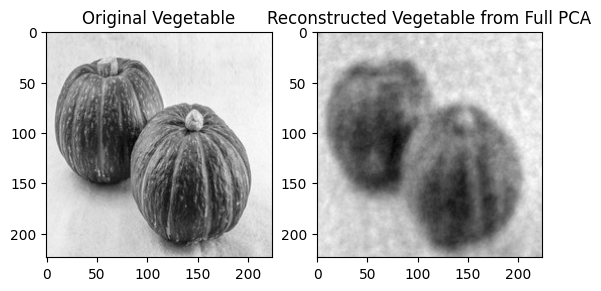

In [88]:
# Assuming you have lists 'features' containing features and 'pca' containing the PCA model

def reconstructVeggie(pca, of):
    loRep = pca.transform(of)
    recImg = pca.inverse_transform(loRep)
    return loRep, recImg

# Define the index of the vegetable to reconstruct
ndxToReconstruct = 5

# Retrieve features for the vegetable to reconstruct
featuresNdx = image_data[ndxToReconstruct]

# Reshape features for a single sample
featuresNdx_reshaped = np.array(featuresNdx).reshape(1, -1)

# Reconstruct the vegetable
loRep, reconstructed = reconstructVeggie(pca, featuresNdx_reshaped)

# Plot original and reconstructed vegetables
plt.subplot(1, 2, 1)
plt.imshow(featuresNdx.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Original Vegetable')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(reconstructed.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Reconstructed Vegetable from Full PCA')
plt.grid(False)

plt.show()

Then we use randomized PCA to reduce the dimensionality of the dataset.

Extracting the top 500 eigenvegetables from 4000 vegetables
CPU times: user 2min 29s, sys: 7.18 s, total: 2min 36s
Wall time: 1min 32s


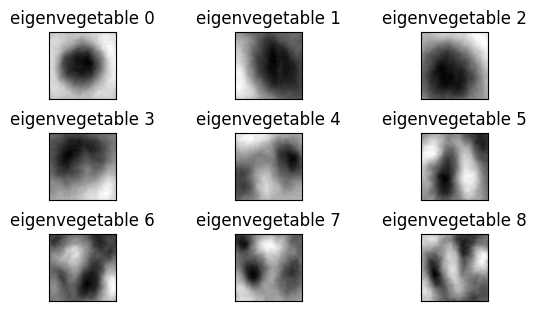

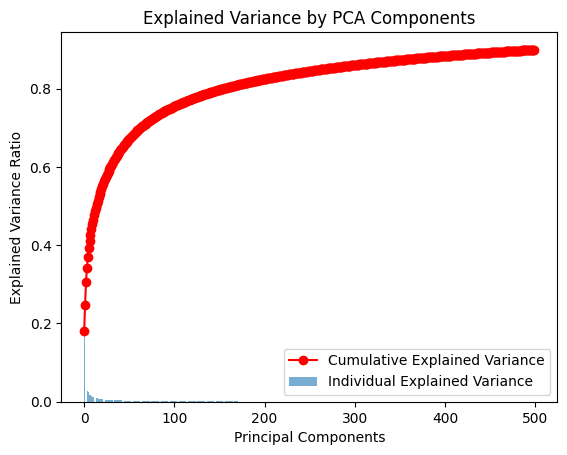

In [ ]:
# # same thing but randomized PCA

# n_components = 500
# print(f'Extracting the top {n_components} eigenvegetables from {features.shape[0]} vegetables')

# rpca = PCA(n_components=n_components, svd_solver='randomized')
# %time rpca.fit(features.copy())
# rEigenvegetables = rpca.components_.reshape((n_components, 224, 224))

# rEigenvegetableTitles = ["eigenvegetable %d" % i for i in range(rEigenvegetables.shape[0])]

# #via ChatGPT4
# for i in range(9):
#     plt.subplot(int(3) + 1, 3, i + 1)
#     plt.imshow(rEigenvegetables[i], cmap='gray')
#     plt.title(rEigenvegetableTitles[i])
#     plt.xticks(())
#     plt.yticks(())
#     plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
# plt.show()

# plot_explained_variance(pca)

list functionality

Extracting the top 500 eigenvegetables from 4000 vegetables
CPU times: user 2min 10s, sys: 6.68 s, total: 2min 17s
Wall time: 1min 24s


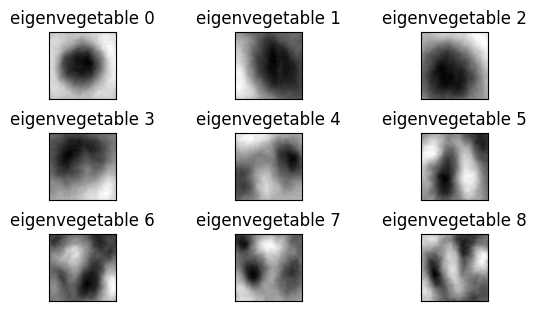

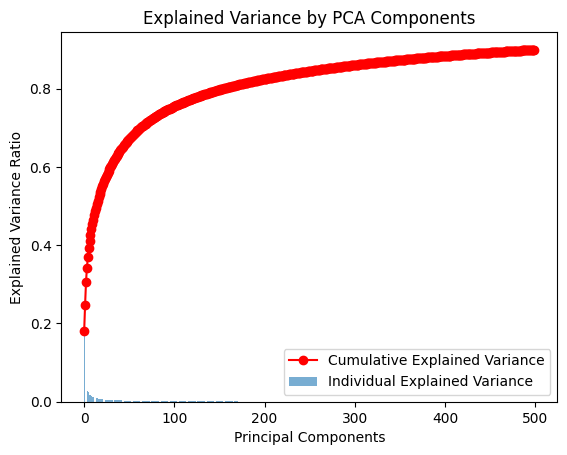

In [89]:
from sklearn.decomposition import PCA

# Function to plot explained variance by PCA components
def plot_explained_variance(pca):
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    plt.bar(range(len(explained_var)), explained_var, alpha=0.6, label='Individual Explained Variance')
    plt.plot(range(len(cum_var_exp)), cum_var_exp, label='Cumulative Explained Variance', color='red', marker='o')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by PCA Components')
    plt.legend(loc='best')
    plt.show()

# Assuming you have lists 'features' containing features

n_components = 500
print(f'Extracting the top {n_components} eigenvegetables from {len(image_data)} vegetables')

# Perform randomized PCA
rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(image_data)

# Reshape eigenvegetables
rEigenvegetables = rpca.components_.reshape((n_components, 224, 224))

rEigenvegetableTitles = ["eigenvegetable %d" % i for i in range(rEigenvegetables.shape[0])]

# Plot first 9 eigenvegetables
for i in range(9):
    plt.subplot(int(3) + 1, 3, i + 1)
    plt.imshow(rEigenvegetables[i], cmap='gray')
    plt.title(rEigenvegetableTitles[i])
    plt.xticks(())
    plt.yticks(())
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Plot explained variance
plot_explained_variance(rpca)


The result is similar to the regular PCA and has a similar reconstructed visualization as the above results from the regular PCA.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


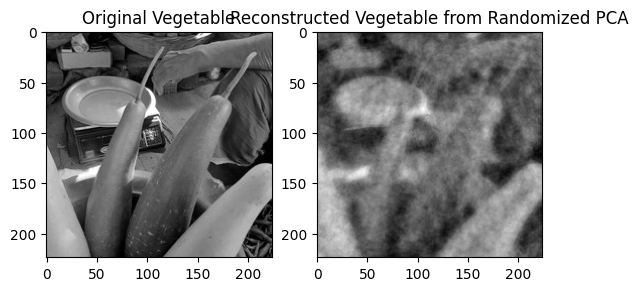

In [ ]:
# ndxToReconstruct = 5

# featuresNdx = features.iloc[ndxToReconstruct].values
# #
# ldr, reconstructed = reconstructVeggie(rpca, featuresNdx.reshape(1, -1))

# plt.subplot(1,2,1)
# plt.imshow(featuresNdx.reshape((224, 224)), cmap=plt.cm.gray)
# plt.title('Original Vegetable')
# plt.grid(False)
# plt.subplot(1,2,2)
# plt.imshow(reconstructed.reshape((224, 224)), cmap=plt.cm.gray)
# plt.title('Reconstructed Vegetable from Randomized PCA')
# plt.grid(False)

list functionality

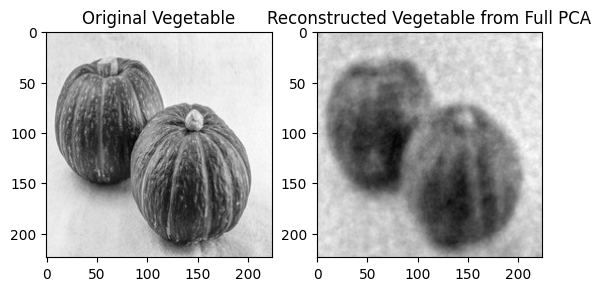

In [90]:
# Assuming you have lists 'features' containing features and 'pca' containing the PCA model

def reconstructVeggie(pca, of):
    loRep = rpca.transform(of)
    recImg = rpca.inverse_transform(loRep)
    return loRep, recImg

# Define the index of the vegetable to reconstruct
ndxToReconstruct = 5

# Retrieve features for the vegetable to reconstruct
featuresNdx = image_data[ndxToReconstruct]

# Reshape features for a single sample
featuresNdx_reshaped = np.array(featuresNdx).reshape(1, -1)

# Reconstruct the vegetable
loRep, reconstructed = reconstructVeggie(rpca, featuresNdx_reshaped)

# Plot original and reconstructed vegetables
plt.subplot(1, 2, 1)
plt.imshow(featuresNdx.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Original Vegetable')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(reconstructed.reshape((224, 224)), cmap=plt.cm.gray)
plt.title('Reconstructed Vegetable from Full PCA')
plt.grid(False)

plt.show()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# calculating the accuracy of PCA
# X = df.drop(columns=['Label'])  # Assuming 'Label' column is the target
# y = df['Label']

X = image_data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Evaluate classifier
y_pred = svm_classifier.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM with PCA:", pca_accuracy)



# calculating the accuracy of RPCA
X_train_rpca = rpca.fit_transform(X_train)
X_test_rpca = rpca.transform(X_test)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_rpca, y_train)

# Evaluate classifier
y_pred = svm_classifier.predict(X_test_rpca)
rpca_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM with RPCA:", rpca_accuracy)



Accuracy of SVM with PCA: 0.915
Accuracy of SVM with RPCA: 0.915


<ipython-input-34-818f34648ed3>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ndx = int(np.random.rand(1) * len(image_data))


NameError: name 'features' is not defined

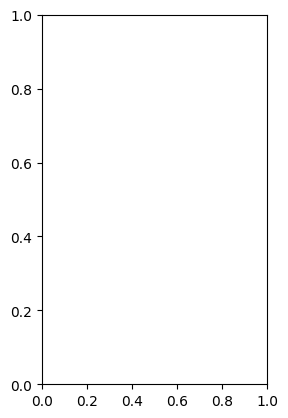

In [ ]:
# # gradient calculation

# from skimage.io import imshow
# from skimage.filters import sobel_h, sobel_v

# plt.subplot(1,2,1)
# ndx = int(np.random.rand(1) * len(features))
# img = features.iloc[ndx].values.reshape((224, 224))
# imshow(img)
# plt.grid(False)


# plt.subplot(1,2,2)
# gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 )
# imshow(gradient_mag)
# plt.grid(False)
# plt.show()

list functionality

<ipython-input-92-0a104b91f26e>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ndx = int(np.random.rand(1) * len(image_data))


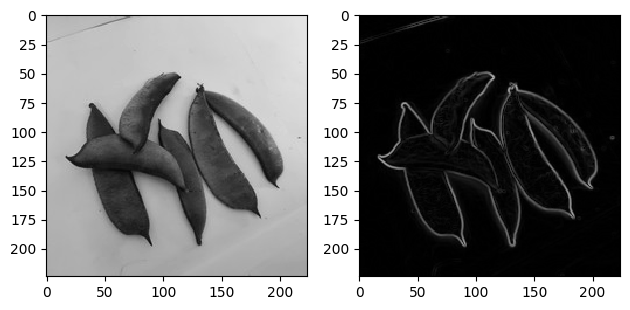

In [92]:
from skimage.io import imshow
from skimage.filters import sobel_h, sobel_v

plt.subplot(1, 2, 1)
ndx = int(np.random.rand(1) * len(image_data))
img = image_data[ndx].reshape((224, 224))
imshow(img, cmap='gray')
plt.grid(False)

plt.subplot(1, 2, 2)
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2)
imshow(gradient_mag, cmap='gray')
plt.grid(False)

plt.show()


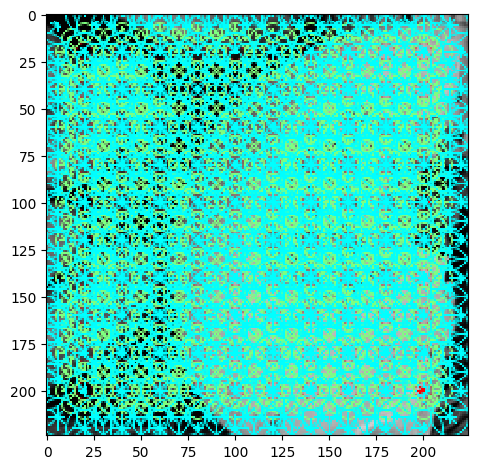

(10, 10, 136)
13600


NameError: name 'features' is not defined

NameError: name 'testFeature' is not defined

In [ ]:
# # feature extraction using DAISY
# # first the preprocessing for DAISY stuff
# from skimage.feature import daisy

# # lets first visualize what the daisy descriptor looks like
# extractedFeatures, imgDesc = daisy(img, step=20, radius=20, rings=2, histograms=8, orientations=8, visualize=True)
# imshow(imgDesc)
# plt.grid(False)
# plt.show()

# print(extractedFeatures.shape)
# print(extractedFeatures.shape[0] * extractedFeatures.shape[1] * extractedFeatures.shape[2])

# def applyDaisy(r, s):
#     feat = daisy(r.reshape(s), step=10, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
#     return feat.reshape((-1))

# %time testFeature = applyDaisy(features.iloc[3].values, (224, 224))
# testFeature.shape

list functionality

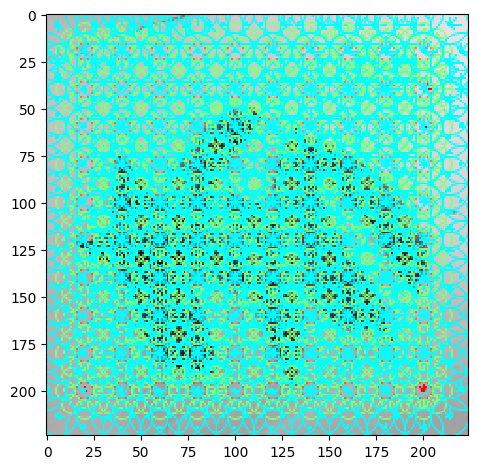

(10, 10, 136)
13600
CPU times: user 86.2 ms, sys: 0 ns, total: 86.2 ms
Wall time: 175 ms


(24548,)

In [93]:
# feature extraction using DAISY
# first the preprocessing for DAISY stuff
from skimage.feature import daisy

# lets first visualize what the daisy descriptor looks like
extractedFeatures, imgDesc = daisy(img, step=20, radius=20, rings=2, histograms=8, orientations=8, visualize=True)
imshow(imgDesc)
plt.grid(False)
plt.show()

print(extractedFeatures.shape)
print(extractedFeatures.shape[0] * extractedFeatures.shape[1] * extractedFeatures.shape[2])

def applyDaisy(r, s):
    feat = daisy(r.reshape(s), step=10, radius=20, rings=2, histograms=8, orientations=4, visualize=False)
    return feat.reshape((-1))

%time testFeature = applyDaisy(image_data[3], (224, 224))
testFeature.shape

In [94]:
# m o r e preprocessing
from sklearn.metrics.pairwise import pairwise_distances

print(f'Estimated runtime: {0.026 * len(image_data)}') # approximate runtime

daisyFeatures = []
for img in image_data:
    daisyFeature = applyDaisy(img, (224, 224))
    daisyFeatures.append(daisyFeature)
daisyFeatures = np.array(daisyFeatures)
print(daisyFeatures.shape)

%time distMtrx = pairwise_distances(daisyFeatures)

Estimated runtime: 104.0
(4000, 24548)
CPU times: user 21.2 s, sys: 1.07 s, total: 22.2 s
Wall time: 12.7 s


In [ ]:
# # now the actual DAISY application
# import copy
# # find closest image to current image
# ndx1 = int(np.random.rand(1) * len(features))
# dists = copy.deepcopy(distMtrx[ndx1,:])
# dists[ndx1] = np.infty
# ndx2 = np.argmin(dists)

# plt.figure(figsize=(7, 10))
# plt.subplot(1, 2, 1)
# imshow(features.iloc[ndx1].values.reshape((224, 224)))
# plt.title("Original Image")
# plt.grid()

# plt.subplot(1, 2, 2)
# imshow(features.iloc[ndx2].values.reshape((224, 224)))
# plt.title("Closest Match")
# plt.grid()

NameError: name 'features' is not defined

<ipython-input-95-b76542ee4fdf>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ndx1 = int(np.random.rand(1) * len(image_data))


False


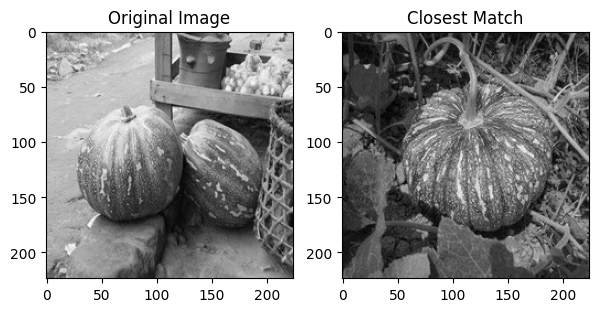

In [95]:
import copy

# Find closest image to a randomly chosen image
ndx1 = int(np.random.rand(1) * len(image_data))

# Calculate distances to other images
dists = copy.deepcopy(distMtrx[ndx1, :])
dists[ndx1] = np.infty

# Find index of the image with the smallest distance
ndx2 = np.argmin(dists)

# Plot the original image and its closest match
plt.figure(figsize=(7, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_data[ndx1].reshape((224, 224)), cmap='gray')
plt.title("Original Image")
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(image_data[ndx2].reshape((224, 224)), cmap='gray')
plt.title("Closest Match")
plt.grid(False)

if np.array_equal(image_data[ndx1], image_data[ndx2]):
    print("True")
else:
    print("False")

plt.show()


In [ ]:
# correct_matches = 0
# total_matches = 0

# for i in range(len(features)):
#     ndx1 = i
#     dists = copy.deepcopy(distMtrx[ndx1,:])
#     dists[ndx1] = np.infty
#     ndx2 = np.argmin(dists)

#     # Check if the label of the closest match matches the label of the original image
#     if df['Label'].iloc[ndx1] == df['Label'].iloc[ndx2]:
#         correct_matches += 1

#     total_matches += 1

# accuracy = correct_matches / total_matches
# print("Accuracy:", accuracy)

NameError: name 'features' is not defined

In [96]:
correct_matches = 0
total_matches = 0

for i in range(len(image_data)):
    ndx1 = i
    dists = copy.deepcopy(distMtrx[ndx1, :])
    dists[ndx1] = np.infty
    ndx2 = np.argmin(dists)

    # Check if the label of the closest match matches the label of the original image
    if labels[ndx1] == labels[ndx2]:
        correct_matches += 1

    total_matches += 1

accuracy = correct_matches / total_matches
print("Accuracy:", accuracy)


Accuracy: 0.85375


In [97]:
print(extractedFeatures)

[[[0.00536909 0.01083579 0.01208118 ... 0.01750907 0.02081475 0.00965443]
  [0.0027814  0.00467662 0.00477404 ... 0.0284612  0.03254854 0.01411583]
  [0.00124133 0.00151667 0.00142208 ... 0.02605412 0.02638843 0.0104643 ]
  ...
  [0.00449431 0.00712274 0.01036623 ... 0.0058615  0.00199058 0.00107455]
  [0.00272504 0.00846181 0.0171574  ... 0.00551352 0.00141702 0.00050859]
  [0.0013557  0.00508344 0.01060432 ... 0.00750019 0.00205013 0.00069051]]

 [[0.00573801 0.00344429 0.00254423 ... 0.02005997 0.02171598 0.00988634]
  [0.00078877 0.00062972 0.000697   ... 0.0202717  0.02061813 0.00933593]
  [0.00163328 0.00175722 0.00198813 ... 0.01113328 0.00888731 0.00472883]
  ...
  [0.00184471 0.00271871 0.00397676 ... 0.00454146 0.00265315 0.00246324]
  [0.00830235 0.00927668 0.01000919 ... 0.00550024 0.00217392 0.00107574]
  [0.00082548 0.00306926 0.00699246 ... 0.00849676 0.00330875 0.00132352]]

 [[0.00221908 0.00267769 0.00262094 ... 0.00359962 0.00310709 0.00221192]
  [0.00117645 0.002062